In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np

In [2]:
data = pkl.load(open('data/output/Multi_eval.pkl', "rb"))

In [3]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']

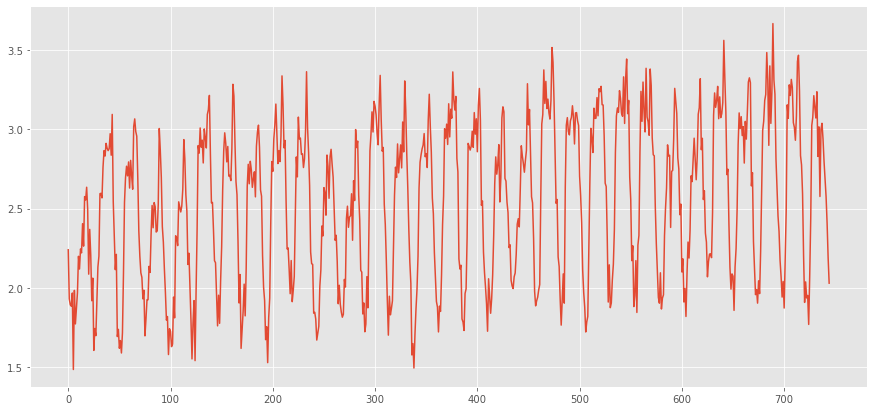

In [4]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [5]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Ambient Temperatures,Actions,Rewards,Total Load,Base Loads
0,21.000000,21.000000,1.125480,1.115002,2.118,0.0,0.000000,2.240482,2.240482
1,19.540432,19.275664,1.003822,0.927929,2.118,0.0,-0.012202,2.440482,1.931751
2,19.541662,19.036135,1.003643,0.890625,2.147,0.0,-0.020659,4.131751,1.894268
3,19.565162,18.839826,1.067182,0.818642,2.324,0.0,-0.020471,4.094268,1.885824
4,19.322953,18.929948,1.021891,0.946730,2.344,0.0,-0.100516,4.085824,1.968620
...,...,...,...,...,...,...,...,...,...
740,19.367048,18.953087,1.293548,1.387289,-2.605,0.0,-0.041129,5.996445,2.680837
741,19.475834,18.863322,1.206444,1.367693,-2.735,0.0,-0.125741,6.080837,2.574136
742,19.334877,19.014508,1.327446,1.079052,-2.760,0.0,-0.115163,5.974136,2.406498
743,19.449624,18.922036,1.113228,1.077268,-2.714,0.0,-0.115627,5.806498,2.190496


In [6]:
data['Rewards'].sum()

-88.80529374393532

In [7]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [8]:
one_week = data.iloc[:,:]

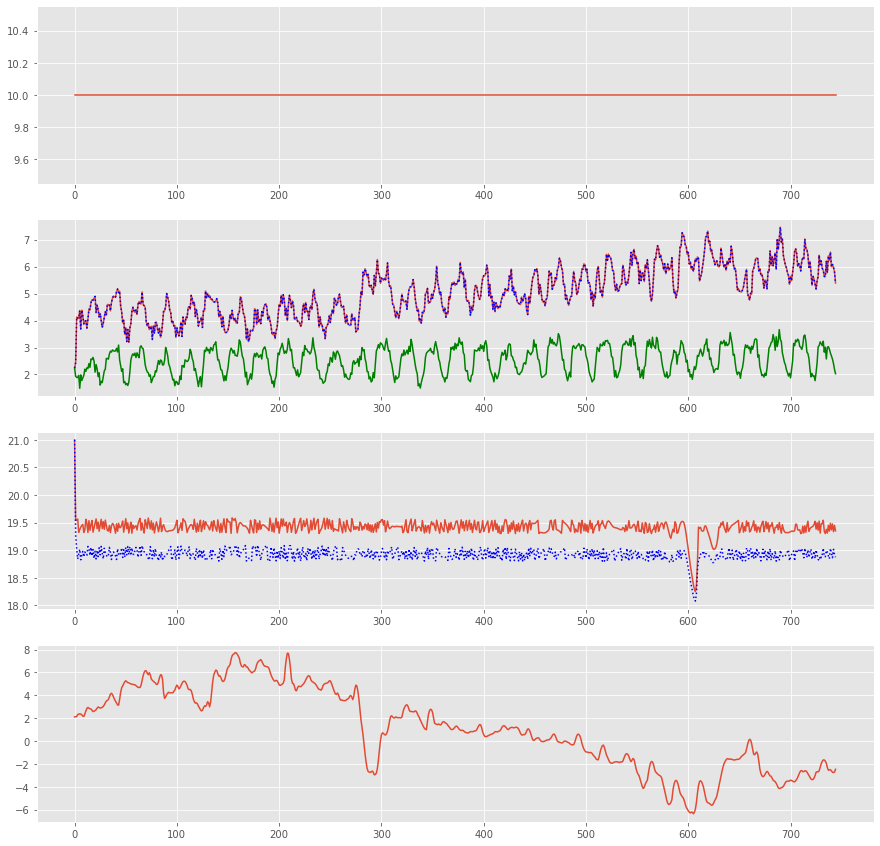

In [13]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Total Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Total Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

In [9]:
sum(data['Total Load'] >= 5)

363

In [10]:
data_base = pkl.load(open('data/output/Multibase_eval.pkl', "rb"))

In [11]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data['Base Loads 2']

In [12]:
data_base['Rewards'].sum()

-88.80529374393532

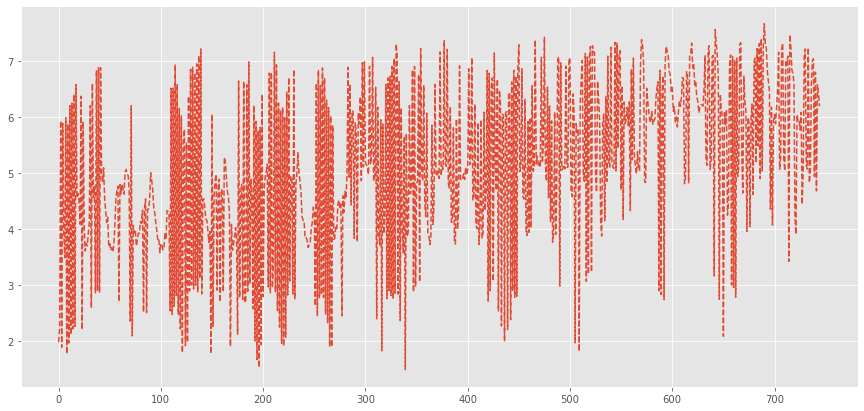

In [63]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [59]:
sum(data_base['Total Load'] >= 5)

389

In [2]:
data = pkl.load(open('data/output/8865455_dynamic_True_rewards_dqn.pkl', "rb"))

In [3]:
data[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1}

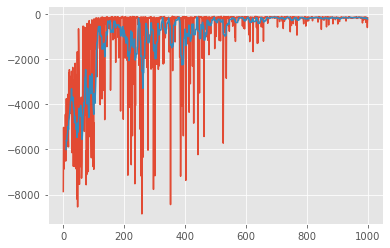

In [4]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

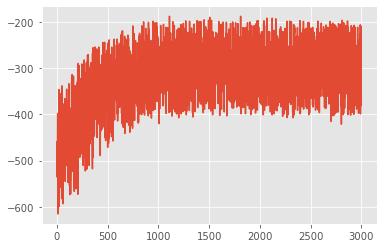

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

In [2]:
data_LP = pkl.load(open('data/output/Multi_LP_eval.pkl', "rb"))

In [3]:
data_LP['Total Load'] = data_LP['Total Load']*1000

In [4]:
sum((data_LP['Total Load'] >= 6.6)*1)

260

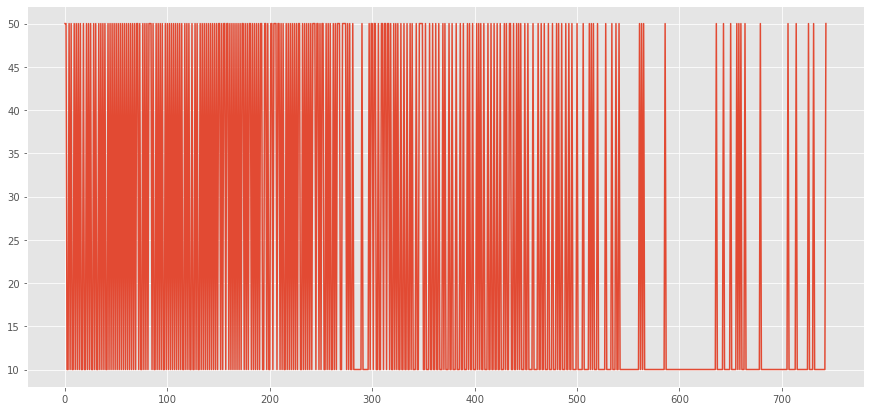

In [7]:
f, ax = plt.subplots(figsize=(15,7))
data_LP['Prices'].plot()